<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/module3-quantile-regression/Quantile_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - birth weight data

Birth weight is a situation where, while the data itself is actually fairly normal and symmetric, our main goal is actually *not* to model mean weight (via OLS), but rather to identify mothers at risk of having children below a certain "at-risk" threshold weight.

Quantile regression gives us just the tool we need. For the data we are using, see: http://people.reed.edu/~jones/141/BirthWgt.html

    bwt: baby's weight in ounces at birth
    gestation: duration of pregnancy in days
    parity: parity indicator (first born = 1, later birth = 0)
    age: mother's age in years
    height: mother's height in inches
    weight: mother's weight in pounds (during pregnancy)
    smoke: indicator for whether mother smokes (1=yes, 0=no) 
    
Use this data and `statsmodels` to fit a quantile regression, predicting `bwt` (birth weight) as a function of the other covariates. First, identify an appropriate `q` (quantile) to target a cutoff of 90 ounces - babies above that birth weight are generally healthy/safe, babies below are at-risk.

Then, fit and iterate your model. Be creative! You may want to engineer features. Hint - mother's age likely is not simply linear in its impact, and the other features may interact as well.

At the end, create at least *2* tables and *1* visualization to summarize your best model. Then (in writing) answer the following questions:

- What characteristics of a mother indicate the highest likelihood of an at-risk (low weight) baby?
- What can expectant mothers be told to help mitigate this risk?

Note that second question is not exactly a data science question - and that's okay! You're not expected to be a medical expert, but it is a good exercise to do a little bit of digging into a particular domain and offer informal but informed opinions.

In [0]:
import patsy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg

In [0]:
df = pd.read_csv('http://people.reed.edu/~jones/141/Bwt.dat')
df.shape

(1174, 7)

In [0]:
df.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


In [0]:
df.describe()

,bwt,gestation,parity,age,height,weight,smoke
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,119.462521,279.101363,0.262351,27.228279,64.049404,128.478705,0.390971
std,18.328671,16.010305,0.440100,5.817839,2.526102,20.734282,0.488176
min,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,108.000000,272.000000,0.000000,23.000000,62.000000,114.250000,0.000000
50%,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


# Linear Regression

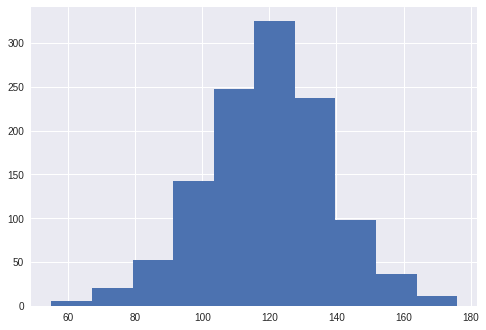

In [0]:
df['bwt'].hist()

In [0]:
from sklearn.linear_model import LinearRegression
X = df.drop('bwt',axis=1)
y = df['bwt']

lin_reg = LinearRegression().fit(X,y)
lin_reg.score(X,y)

0.2579534937842991

# Quantile Regression via Least Absolute Deviation
...fit to the median

In [0]:
import statsmodels.formula.api as smf
quant_formula = 'bwt ~ ' + ' + '.join(df.drop('bwt',axis=1).columns)
print(quant_formula)

quant_mod = smf.quantreg(quant_formula, data=df)
quant_reg = quant_mod.fit(q=.5)
quant_reg.summary()

bwt ~ gestation + parity + age + height + weight + smoke


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                    bwt   Pseudo R-squared:               0.1365
Model:                       QuantReg   Bandwidth:                       6.851
Method:                 Least Squares   Sparsity:                        37.19
Date:                Wed, 27 Feb 2019   No. Observations:                 1174
Time:                        22:05:50   Df Residuals:                     1167
                                        Df Model:                            6
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -93.3364     16.853     -5.538      0.000    -126.402     -60.271
gestation      0.4868      0.034     14.242      0.000       0.420       0.554
parity        -2.2658      1.326     -1.709      0.088      -4.868       0.336
age           -0.0015      0.101     -0.015      0.988      -0.199       0.196
height         1.1192      0.241      4.647      0.000       0.647       1.592
weight         0.0684      0.030      2.308      0.021       0.010       0.127
smoke         -8.0711      1.120     -7.203      0.000     -10.269      -5.873
==============================================================================

The condition number is large, 9.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Quantile Regression with Target Quantile

In [0]:
# Let's get that quantile for small babies
df['bwt'].quantile(.055)

90.0

In [0]:
# Generate a model with appropriate quantile value
quant_formula = 'bwt ~ ' + ' + '.join(df.drop('bwt',axis=1).columns)
quant_mod = smf.quantreg(quant_formula, data=df)
quant_reg = quant_mod.fit(q=.055)
quant_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                    bwt   Pseudo R-squared:               0.2001
Model:                       QuantReg   Bandwidth:                       6.255
Method:                 Least Squares   Sparsity:                        132.8
Date:                Wed, 27 Feb 2019   No. Observations:                 1174
Time:                        22:06:03   Df Residuals:                     1167
                                        Df Model:                            6
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -96.3832     32.007     -3.011      0.003    -159.182     -33.585
gestation      0.4806      0.089      5.412      0.000       0.306       0.655
parity        -3.2590      2.347     -1.388      0.165      -7.865       1.347
age           -0.0882      0.170     -0.517      0.605      -0.423       0.246
height         1.2257      0.437      2.807      0.005       0.369       2.082
weight        -0.1193      0.057     -2.099      0.036      -0.231      -0.008
smoke         -8.6951      1.867     -4.656      0.000     -12.359      -5.031
==============================================================================

The condition number is large, 9.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The larger the t-stastic and coefficient, the more significant the variable. It looks like like the coefficients are big for smoke and parity but t-stat is only high for gestation and smoke. Smoking intuitively seems to be contribute to unhealthy babies. From the strength of the smoking coefficient alone, we can say that when mothers smoke, their babies will weigh 8.9 ounces in that quantile.

In [0]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
from statsmodels.tools.tools import add_constant
X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const        990.330717
bwt            1.347624
gestation      1.218695
parity         1.164258
age            1.167026
height         1.289731
weight         1.286635
smoke          1.082462
dtype: float64

No variance inflation factors are > 5, multi-colienarity problems do not exist in this dataset.

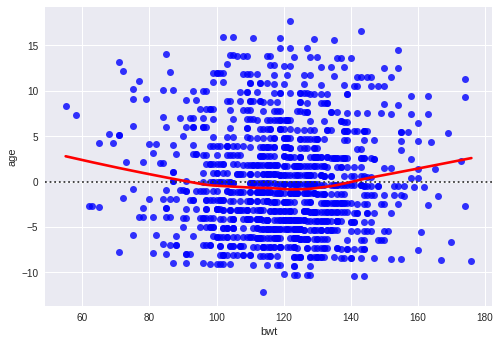

In [0]:
import seaborn as sns
sns.residplot('bwt','age',data=df, lowess=True, color="r", scatter_kws={'color':'blue'})

It seems like we could use some polynomical features to account for the non-linear relationships.

In [0]:
X.columns

Index(['gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

In [0]:
# Make polynomial features
for i in X.columns:
  df[i+'_sq'] = df[i] ** 2

In [0]:
df.drop(['smoke_sq','parity_sq'],axis=1,inplace=True)
df.head()

,bwt,gestation,parity,age,height,weight,smoke,gestation_sq,age_sq,height_sq,weight_sq
0,120,284,0,27,62,100,0,80656,729,3844,10000
1,113,282,0,33,64,135,0,79524,1089,4096,18225
2,128,279,0,28,64,115,1,77841,784,4096,13225
3,108,282,0,23,67,125,1,79524,529,4489,15625
4,136,286,0,25,62,93,0,81796,625,3844,8649


In [0]:
# QR with poly features
quant_formula = 'bwt ~ ' + ' + '.join(df.drop('bwt',axis=1).columns)
quant_mod = smf.quantreg(quant_formula, data=df)
quant_reg = quant_mod.fit(q=.055)
quant_reg.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                    bwt   Pseudo R-squared:               0.2333
Model:                       QuantReg   Bandwidth:                       5.949
Method:                 Least Squares   Sparsity:                        124.4
Date:                Wed, 27 Feb 2019   No. Observations:                 1174
Time:                        22:07:45   Df Residuals:                     1163
                                        Df Model:                           10
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7078    410.683     -0.002      0.999    -806.470     805.054
gestation        4.5709      0.555      8.240      0.000       3.483       5.659
parity          -2.7549      2.349     -1.173      0.241      -7.364       1.854
age              0.2423      1.377      0.176      0.860      -2.459       2.944
height         -21.1823     12.610     -1.680      0.093     -45.922       3.558
weight           0.8055      0.292      2.755      0.006       0.232       1.379
smoke           -8.5262      1.717     -4.965      0.000     -11.896      -5.157
gestation_sq    -0.0072      0.001     -6.790      0.000      -0.009      -0.005
age_sq          -0.0072      0.023     -0.314      0.754      -0.052       0.038
height_sq        0.1695      0.099      1.705      0.088      -0.026       0.365
weight_sq       -0.0032      0.001     -3.404      0.001      -0.005      -0.001
================================================================================

The condition number is large, 3.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As long as our features are showing statistical significance, we know they are important regardless of the pseudo-r^2.

## Resources and stretch goals

Resources:
- [statsmodels QuantReg example](http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html)
- [How Shopify used Quantile Regression in modeling risk](https://medium.com/data-shopify/how-shopify-capital-uses-quantile-regression-to-help-merchants-succeed-10ee1b36b17d)

Stretch goals:
- Find a dataset where you think quantile regression may be appropriate, and try both it and linear regression - compare/contrast their strengths/weaknesses, and write a summary for which you think is better for the situation and why
- Check out [deep quantile regression](https://www.kdnuggets.com/2018/07/deep-quantile-regression.html), an approach that uses a custom quantile loss function and Keras to train a quantile model